# 鸢尾花的二分类_v0.1

In [51]:
## 导包
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## 1. 提出问题

根据处理好的数据集iris_bi.data.csv,进行两种鸢尾花setosa和versicolor的分类。

## 2.导入新的数据集

In [52]:
datasets_path = 'data/iris_bi.data.csv'
iris = pd.read_csv(datasets_path,header=None)
print(iris.sample(5))

      0    1  2
35  1.2  0.2  0
60  3.5  1.0  1
71  4.0  1.3  1
16  1.3  0.4  0
56  4.7  1.6  1


In [53]:
# 转换为np.array
iris = np.array(iris)
print(type(iris))
print(iris.shape)

<class 'numpy.ndarray'>
(100, 3)


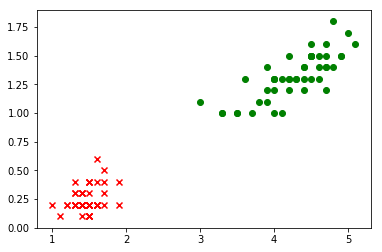

In [54]:
# 可视化
plt.scatter(iris[:49,0],iris[:49,1],marker='x',c='red')
plt.scatter(iris[50:99,0],iris[50:99,1],marker='o',c='green')

In [55]:
# 拆分特征和标签
iris_X = iris[:,0:2]
iris_y = iris[:,-1]
print("特征集的形状：" + str(iris_X.shape))
print("标签集的形状：" + str(iris_y.shape))

特征集的形状：(100, 2)
标签集的形状：(100,)


In [56]:
# 拆分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(iris_X,iris_y,test_size=0.25)
print("训练特征集的形状：" + str(X_train.shape))
print("训练标签集的形状：" + str(y_train.shape))
print("测试特征集的形状：" + str(X_test.shape))
print("测试标签集的形状：" + str(y_test.shape))

训练特征集的形状：(75, 2)
训练标签集的形状：(75,)
测试特征集的形状：(25, 2)
测试标签集的形状：(25,)


## 2.训练模型

In [57]:
# 搭建模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2))
model.summary()  # 查看模型结构

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 编译模型
model.compile(optimizer='sgd', loss='mse')

In [59]:
# 训练模型
history = model.fit(X_train, y_train,epochs=100)

Epoch 1/100
75/75 [==============================] - 0s 2ms/step - loss: 3.5816
Epoch 2/100
75/75 [==============================] - 0s 126us/step - loss: 0.7773
Epoch 3/100
75/75 [==============================] - 0s 243us/step - loss: 0.3197
Epoch 4/100
75/75 [==============================] - 0s 238us/step - loss: 0.2034
Epoch 5/100
75/75 [==============================] - 0s 294us/step - loss: 0.1746
Epoch 6/100
75/75 [==============================] - 0s 176us/step - loss: 0.1686
Epoch 7/100
75/75 [==============================] - 0s 212us/step - loss: 0.1647
Epoch 8/100
75/75 [==============================] - 0s 206us/step - loss: 0.1609
Epoch 9/100
75/75 [==============================] - 0s 241us/step - loss: 0.1572
Epoch 10/100
75/75 [==============================] - 0s 170us/step - loss: 0.1543
Epoch 11/100
75/75 [==============================] - 0s 287us/step - loss: 0.1508
Epoch 12/100
75/75 [==============================] - 0s 358us/step - loss: 0.1474
Epoch 13/100
75

75/75 [==============================] - 0s 111us/step - loss: 0.0366


## 3.评估模型

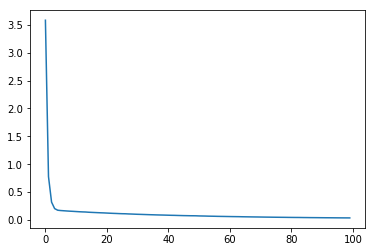

In [60]:
# 输出loss函数的变化
plt.plot(history.history['loss'])

In [61]:
# 在测试集上loss函数的值
model.evaluate(X_test,y_test)

25/25 [==============================] - 0s 3ms/step


0.030918527394533157

## 4.使用模型

In [80]:
# 在测试集上进行预测
print("=====真实结果=====")
print(y_test)
print("=====预测结果=====")
predict = model.predict(X_test.reshape(-1,2))
print(predict.reshape(1,-1))

=====真实结果=====
[0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0.]
=====预测结果=====
[[ 0.26433852  0.12519976  1.1531546   0.16561392  0.9152911   0.17456213
   0.22392443  1.0544298   0.645962    0.17456213  1.0769477   0.07583749
   0.8255148  -0.02288714  0.28223488  0.9467571   0.9736016   1.1442063
   0.9467571   1.1846204   0.22392443  0.12519976  0.17456213  0.17456213
   0.28223488]]


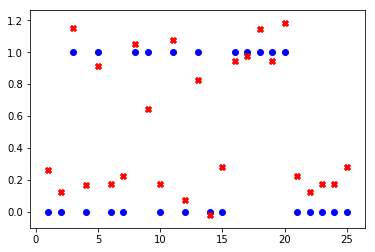

In [69]:
# 可视化预测结果
x=np.arange(1,26) 
#print(model.predict(X_test.reshape(25,2)))
plt.scatter(x,y_test,marker='o',c='blue')
plt.scatter(x,predict,marker='X',c='red')

In [81]:
# 使用真实的样本进行预测
target = model.predict(np.array([[6.5,3.9]]))[0][0]
print(target)

0.5345514
